Aula 04


SP0087RA002.csv
SP0091RA002.csv
SP0096RA002.csv
SP0291RA002.csv


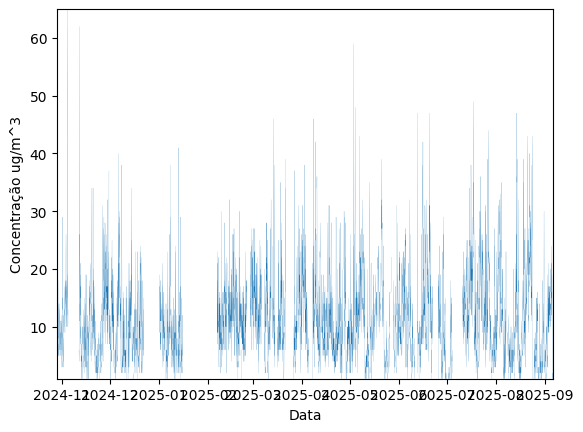

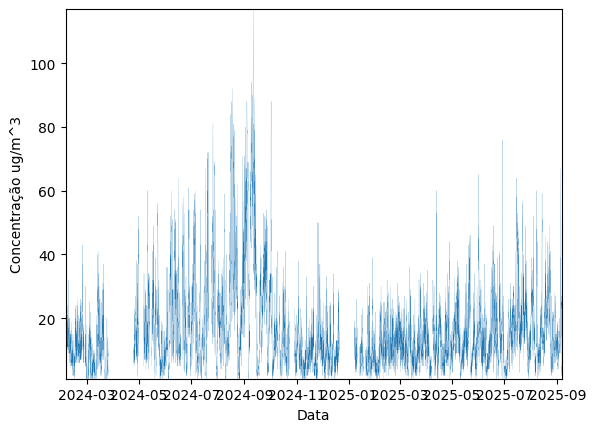

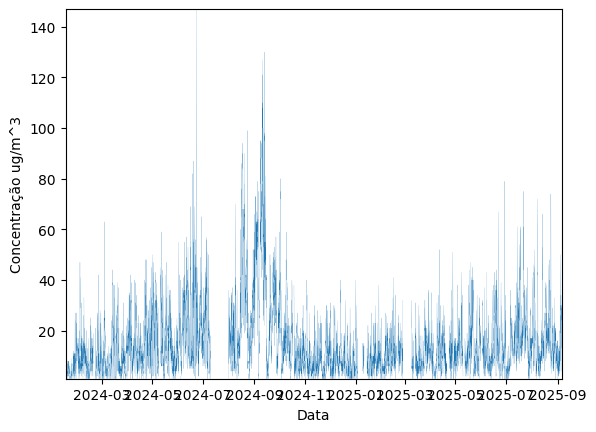

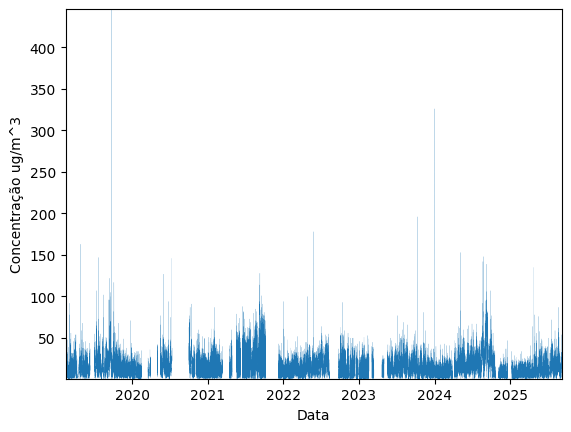

In [135]:
#Automatizando com o pacote os
import os
import pandas as pd
import matplotlib.pyplot as plt
files = os.listdir(r"C:\Users\sbswi\Documents\GitHub\python_env_app\dados")
files = [fname for fname in files if fname.endswith('.csv')]
files
#loop em cada arquivo
for file in files:
    print(file)
#abre o arquivo
    df = pd.read_csv(r'C:\Users\sbswi\Documents\GitHub\python_env_app\dados'+'/'+file)
    df['DATETIME'] = pd.to_datetime(df['DATETIME'])
    fig, ax = plt.subplots()
    ax.plot(df.DATETIME,df.VALOR,linewidth = 0.1)
    ax.set_xlim([df.DATETIME.min(),df.DATETIME.max()])
    ax.set_ylim([df.VALOR.min(),df.VALOR.max()])
    ax.set_ylabel('Concentração ug/m^3')
    ax.set_xlabel('Data')
    fig.savefig(r"C:\Users\sbswi\Documents\GitHub\python_env_app\outputs"+file.split(".")[0]+'.png')
    

In [145]:
#Criando um unico dataframe com varias colunas de dados
#loop em cada arquivo
df_list = []
for ii,file in enumerate(files):
    print(file)
    print(ii)
    #abrindo o arquivo
    df = pd.read_csv(r"C:\Users\sbswi\Documents\GitHub\python_env_app\dados" + "/"+ file)

    #transfomar em datetime 
    df['DATETIME'] = pd.to_datetime(df['DATETIME'])
    df.set_index(df['DATETIME'])
    df = df[['ANO','MES','DIA','HORA','VALOR']]
    df.rename(columns={'VALOR':file.split('.')[0]},inplace = True)
    df_list.append(df)
    
df = pd.concat(df_list)
df.head()

SP0087RA002.csv
0
SP0091RA002.csv
1
SP0096RA002.csv
2
SP0291RA002.csv
3


,ANO,MES,DIA,HORA,SP0087RA002,SP0091RA002,SP0096RA002,SP0291RA002
0,2024,10,28,15,1.0,NaN,NaN,NaN
1,2024,10,28,16,8.0,NaN,NaN,NaN
2,2024,10,28,17,10.0,NaN,NaN,NaN
3,2024,10,28,18,8.0,NaN,NaN,NaN
4,2024,10,28,19,5.0,NaN,NaN,NaN


C:\Users\sbswi\AppData\Local\Temp\ipykernel_16448\4186079007.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


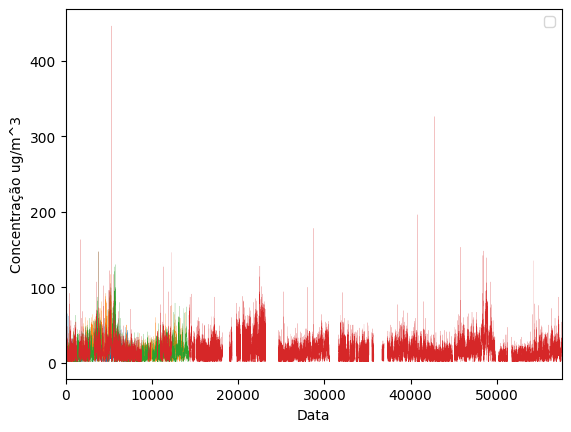

In [146]:
#df['DATETIME'] = pd.to_datetime(df['DATETIME'])
fig, ax = plt.subplots()
ax.plot(df.index,df.iloc[:,4:],linewidth = 0.1)
ax.set_xlim([df.index.min(),df.index.max()])
#ax.set_ylim([df.df.iloc[:,3:].min(),df.df.iloc[:,3:].max()])
ax.set_ylabel('Concentração ug/m^3')
ax.set_xlabel('Data')
ax.legend()
fig.savefig(r"C:\Users\sbswi\Documents\GitHub\python_env_app\outputs"+file.split(".")[0]+'.png')


<Axes: >

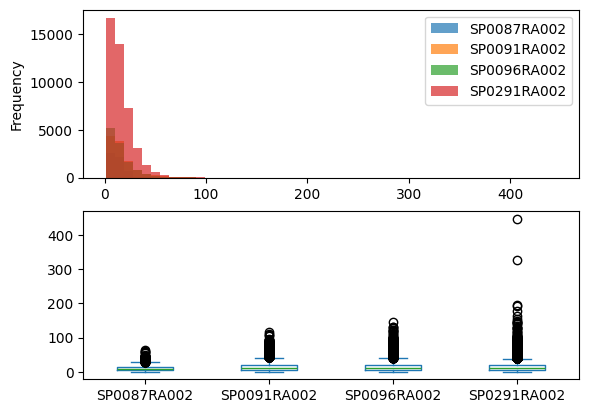

In [138]:
#HISTOGRAMA
fig,ax = plt.subplots(2)
df.iloc[:, 4:].plot(kind='hist', bins=50, ax=ax[0], alpha=0.7)
df.iloc[:, 4:].plot.box(ax=ax[1])


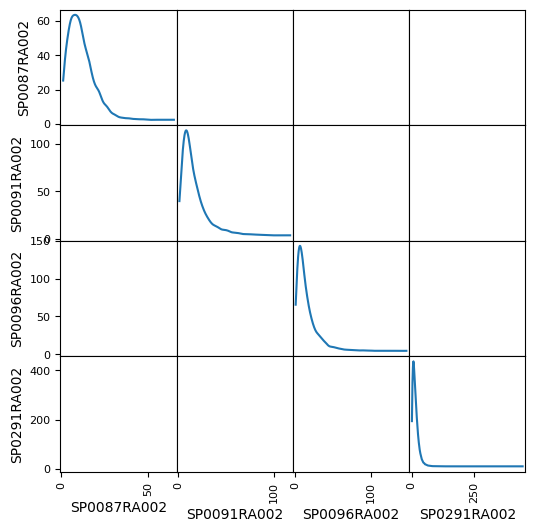

In [139]:
from pandas.plotting import scatter_matrix
scatter_matrix(df.iloc[:,4:],alpha = 0.2, figsize = (6,6), diagonal = 'kde');

In [140]:
correlation_matrix = df.corr()
correlation_matrix

,ANO,MES,DIA,HORA,SP0087RA002,SP0091RA002,SP0096RA002,SP0291RA002
ANO,1.000000,-0.165446,-0.010873,0.000062,0.070512,-0.166886,-0.117153,-0.055267
MES,-0.165446,1.000000,-0.004668,-0.000260,-0.039385,0.182200,0.163370,0.137621
DIA,-0.010873,-0.004668,1.000000,0.000102,-0.031991,-0.016324,-0.069636,-0.001798
HORA,0.000062,-0.000260,0.000102,1.000000,-0.140379,-0.061473,-0.035416,0.072905
SP0087RA002,0.070512,-0.039385,-0.031991,-0.140379,1.000000,NaN,NaN,NaN
SP0091RA002,-0.166886,0.182200,-0.016324,-0.061473,NaN,1.000000,NaN,NaN
SP0096RA002,-0.117153,0.163370,-0.069636,-0.035416,NaN,NaN,1.000000,NaN
SP0291RA002,-0.055267,0.137621,-0.001798,0.072905,NaN,NaN,NaN,1.000000


In [ ]:
import seaboarn